
🚀 訓練模型（Activation: sigmoid）
⏱ 訓練時間: 47.06 秒, 🎯 測試準確率: 0.9775

🚀 訓練模型（Activation: softplus）
⏱ 訓練時間: 50.19 秒, 🎯 測試準確率: 0.9783

🚀 訓練模型（Activation: relu）
⏱ 訓練時間: 47.70 秒, 🎯 測試準確率: 0.9803


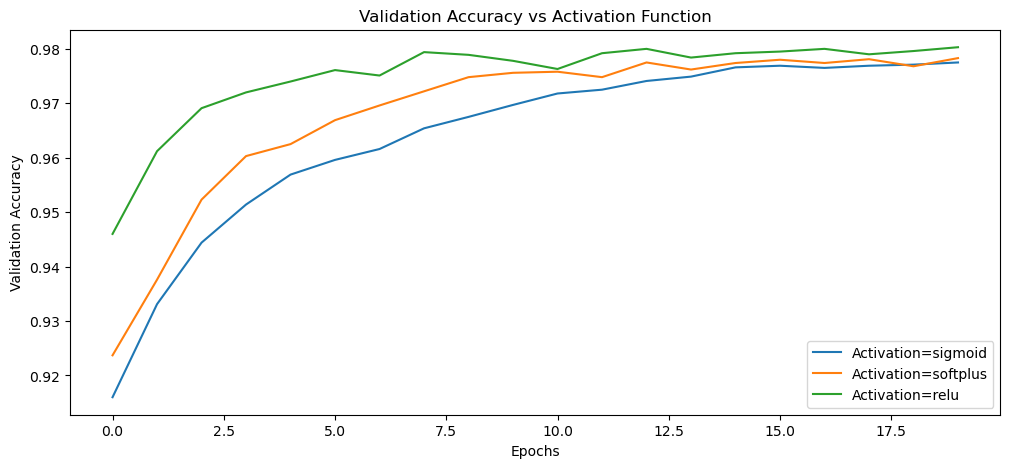

In [2]:
# 匯入必要的函式庫
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# 1️⃣ 載入 MNIST 數據集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2️⃣ 數據預處理
x_train = x_train.reshape(60000, 28 * 28).astype('float32') / 255
x_test = x_test.reshape(10000, 28 * 28).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3️⃣ 建立神經網路模型（不同激活函數）
def build_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(784,)))  # 🔹 使用 Input() 定義輸入層
    model.add(Dense(128, activation=activation))  # 隱藏層，使用不同的激活函數
    model.add(Dense(10, activation='softmax'))  # 輸出層（分類問題）

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])  # 🔹 使用 Accuracy 作為評估指標
    
    return model

# 4️⃣ 設定不同的激活函數
activations = ['sigmoid', 'softplus', 'relu']
history_dict = {}

# 5️⃣ 訓練不同激活函數的模型
for activation in activations:
    print(f"\n🚀 訓練模型（Activation: {activation}）")
    model = build_model(activation=activation)

    # 記錄訓練時間
    start_time = time.time()
    
    # 訓練模型
    history = model.fit(x_train, y_train, 
                        epochs=20, batch_size=128, 
                        validation_data=(x_test, y_test),
                        verbose=0)
    
    training_time = time.time() - start_time  # 計算訓練時間
    test_acc = model.evaluate(x_test, y_test, verbose=0)[1]  # 測試準確率

    # 儲存結果
    history_dict[activation] = history
    print(f"⏱ 訓練時間: {training_time:.2f} 秒, 🎯 測試準確率: {test_acc:.4f}")

# 6️⃣ 繪製學習曲線（Validation Accuracy）
plt.figure(figsize=(12, 5))
for activation in activations:
    history = history_dict[activation]
    plt.plot(history.history['val_accuracy'], label=f'Activation={activation}')

plt.title("Validation Accuracy vs Activation Function")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()
